# AL exercises

## Libraries

In [1]:
import numpy as np
import pandas as pd

import math
from math import sqrt
from tqdm import tqdm

import matplotlib.pyplot as plt

import seaborn as sns

import random
random.seed(141)
np.random.seed(141)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

import warnings
warnings.filterwarnings('ignore') 

givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit

## data

In [2]:
# read csv (no categorical, no missing value)
my_df_orig = pd.read_csv("lab_AL_rnd_dataset.csv")

In [3]:
my_df_orig["clabel"].value_counts()

0    1060
1    1060
Name: clabel, dtype: int64

In [4]:
labels = np.array(my_df_orig['clabel'])
my_df = my_df_orig.drop('clabel', axis=1) # remove rowIDs from the rows

In [5]:
# setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.
X_train, X_test, y_train, y_test = train_test_split(my_df, labels, test_size = 0.20, random_state = 42)

print('Training instances Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing instances Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training instances Shape: (1696, 11)
Training Labels Shape: (1696,)
Testing instances Shape: (424, 11)
Testing Labels Shape: (424,)


## helper functions

In [6]:
def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

    print('\n')
    print("d_accuracy" + '\t' + str(d_accuracy))
    print("v_recall" + '\t' + str(v_recall[0]) + '\t' + str(v_recall[1]) + '\t' + str(d_recallAvg))
    print("v_prec" + '\t' + str(v_prec[0]) + '\t' + str(v_prec[1]) + '\t' + str(d_precAvg))
    
    #print('\n')
    #for i in range(len(gtestLabels)):
    #    print("row " + str(i) + '\t' + str(gtestLabels[i]) + '\t' + str(givenDec(gTestPred[i])))

## supervised learning

### Logistic Regression

In [7]:
clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_results(y_test, y_predict)



              precision    recall  f1-score   support

           0     0.8204    0.8284    0.8244       204
           1     0.8394    0.8318    0.8356       220

    accuracy                         0.8302       424
   macro avg     0.8299    0.8301    0.8300       424
weighted avg     0.8303    0.8302    0.8302       424



d_accuracy	0.8302
v_recall	0.8284	0.8318	0.8302
v_prec	0.8204	0.8394	0.8303


In [8]:
scores = cross_val_score(LogisticRegression(), my_df, labels, cv=10, scoring='accuracy')
print("scores", scores)
print("avg_score", givenDec(np.mean(scores)))

scores [0.72641509 0.79716981 0.81132075 0.85849057 0.85377358 0.89150943
 0.8490566  0.86320755 0.79245283 0.66509434]
avg_score 0.811


### Decision Tree Classifier

In [9]:
clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_results(y_test, y_predict)



              precision    recall  f1-score   support

           0     0.9265    0.9265    0.9265       204
           1     0.9318    0.9318    0.9318       220

    accuracy                         0.9292       424
   macro avg     0.9291    0.9291    0.9291       424
weighted avg     0.9292    0.9292    0.9292       424



d_accuracy	0.9292
v_recall	0.9265	0.9318	0.9292
v_prec	0.9265	0.9318	0.9292


In [10]:
scores = cross_val_score(DecisionTreeClassifier(), my_df, labels, cv=10, scoring='accuracy')
print("scores", scores)
print("avg_score", givenDec(np.mean(scores)))

scores [0.78301887 0.78301887 0.88679245 0.87264151 0.85849057 0.89150943
 0.9245283  0.87735849 0.80660377 0.84433962]
avg_score 0.853


### Gaussian NB Classifier

In [11]:
clf = GaussianNB()
model = clf.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_results(y_test, y_predict)



              precision    recall  f1-score   support

           0     0.8232    0.7990    0.8109       204
           1     0.8186    0.8409    0.8296       220

    accuracy                         0.8208       424
   macro avg     0.8209    0.8200    0.8203       424
weighted avg     0.8208    0.8208    0.8206       424



d_accuracy	0.8208
v_recall	0.799	0.8409	0.8208
v_prec	0.8232	0.8186	0.8208


In [12]:
scores = cross_val_score(GaussianNB(), my_df, labels, cv=10, scoring='accuracy')
print("scores", scores)
print("avg_score", givenDec(np.mean(scores)))

scores [0.68867925 0.73113208 0.83490566 0.83962264 0.85377358 0.9009434
 0.93396226 0.89622642 0.76886792 0.66981132]
avg_score 0.812


## Impact of training set size

In [13]:
def update_learning_region(X_train, X_Remained, y_train, y_Remained, query_indices):
    X_train=pd.concat([X_train,X_Remained.loc[query_indices]]).reset_index(drop=True)
    y_train=pd.concat([y_train,y_Remained.loc[query_indices]]).reset_index(drop=True)

    X_Remained=X_Remained.drop(query_indices , axis=0).reset_index(drop=True)
    y_Remained=y_Remained.drop(query_indices ,axis=0).reset_index(drop=True)
    return X_train, X_Remained, y_train, y_Remained

In [14]:
def update_results(results, rep, y_test, y_pred, name, train_shape, dataset_shape):
    results["accuracy"][rep].append(round(accuracy_score(y_test, y_pred[name]),3))
    results["percentage"][rep].append(train_shape / dataset_shape )
    results["train_size"][rep].append(train_shape )

    # print("results[accuracy][rep]", results["accuracy"][rep])

    return results

In [15]:
def split_data(X_pool, y_pool, testing_size, step_size, y_col, initial_indices=None):

    X_test=X_pool.iloc[:testing_size].reset_index(drop=True)
    y_test=y_pool.iloc[:testing_size].reset_index(drop=True)

    X_Remained=X_pool.iloc[testing_size:].reset_index(drop=True)
    y_Remained =y_pool.iloc[testing_size:].reset_index(drop=True)

    X_train=X_Remained.iloc[:step_size].reset_index(drop=True)
    y_train=y_Remained.iloc[:step_size].reset_index(drop=True)

    X_Remained = X_Remained.iloc[step_size:].reset_index(drop=True)
    y_Remained = y_Remained.iloc[step_size:].reset_index(drop=True)

    return X_test, y_test, X_Remained, y_Remained, X_train, y_train

In [16]:
def trainSingleModel(df, repp, testing_size, step_size, n_learning_steps, cmodel, name, save_path=""):
    multiplier = 1.0
    y_col = "clabel"
    x_cols = ["col1","col2","col3","col4","col5","col6","col7","col8","col9","col10","col11"]
    
    measures_new = ["accuracy", "percentage", "train_size"]
    results = dict((meas,{}) for meas in measures_new)
    for l in results:
        results[l] = dict((n_rep,[]) for n_rep in repp)

    for rep in repp:
        print("Repetition ", rep)
        df = df.sample(frac=1,random_state=rep).reset_index(drop=True)
        y_pool = df.loc[:,y_col]
        X_pool = df.loc[:,x_cols]
        X_test, y_test, X_Remained, y_Remained, X_train, y_train = split_data(X_pool, y_pool, testing_size, step_size, y_col)
        for i in range(n_learning_steps):
            # print("learning step: ", i)
            batch_query_indices = range(0, step_size)
            X_train, X_Remained, y_train, y_Remained = update_learning_region(X_train, X_Remained, y_train, y_Remained, batch_query_indices)

            y_pred=pd.DataFrame()
            cmodel.fit(X_train,y_train)

            y_pred[name] = cmodel.predict(X_test).round(3)
            results = update_results(results, rep, y_test, y_pred, name, X_train.shape[0], X_pool.shape[0])

    # np.save(save_path, results)
    return results

### Training Set Size: Logistic Regression

In [17]:
number_of_rep = 30
step_size = 50
n_learning_steps = 32
testing_size = int(0.2*len(my_df_orig))

clf = LogisticRegression()
m_name = "logRegression"

results_logR = trainSingleModel(my_df_orig, range(number_of_rep), testing_size, step_size, n_learning_steps, clf, m_name, save_path="")

Repetition  0
Repetition  1
Repetition  2
Repetition  3
Repetition  4
Repetition  5
Repetition  6
Repetition  7
Repetition  8
Repetition  9
Repetition  10
Repetition  11
Repetition  12
Repetition  13
Repetition  14
Repetition  15
Repetition  16
Repetition  17
Repetition  18
Repetition  19
Repetition  20
Repetition  21
Repetition  22
Repetition  23
Repetition  24
Repetition  25
Repetition  26
Repetition  27
Repetition  28
Repetition  29


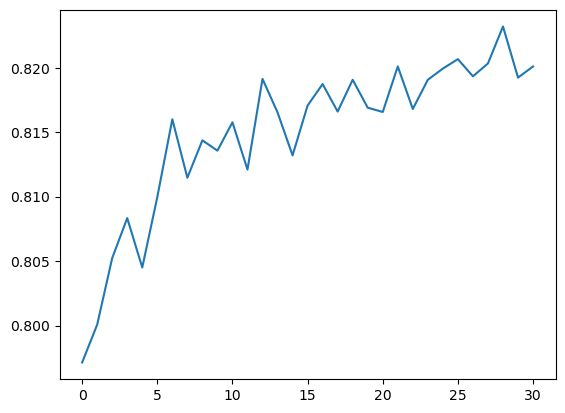

In [18]:
mean_rep_logR = []
for bd in range(n_learning_steps-1):
    temp_mean = []
    for rep in range(number_of_rep):
        temp_mean.append(results_logR["accuracy"][rep][bd])
    mean_rep_logR.append(np.mean(temp_mean))

# print(mean_rep_logR)

plt.plot(mean_rep_logR)
# plt.show()
# sns.distplot(results["accuracy"][0], kde=True, hist=False, norm_hist=False, bins=5, label='SS')
plt.show()

In [19]:
mean_rep_logR[0]

0.7971333333333332

### Training Set Size: DT

In [20]:
number_of_rep = 30
step_size = 50
n_learning_steps = 32
testing_size = int(0.2*len(my_df_orig))

clf = DecisionTreeClassifier()
m_name = "DT"

results_DT = trainSingleModel(my_df_orig, range(number_of_rep), testing_size, step_size, n_learning_steps, clf, m_name, save_path="")

Repetition  0
Repetition  1
Repetition  2
Repetition  3
Repetition  4
Repetition  5
Repetition  6
Repetition  7
Repetition  8
Repetition  9
Repetition  10
Repetition  11
Repetition  12
Repetition  13
Repetition  14
Repetition  15
Repetition  16
Repetition  17
Repetition  18
Repetition  19
Repetition  20
Repetition  21
Repetition  22
Repetition  23
Repetition  24
Repetition  25
Repetition  26
Repetition  27
Repetition  28
Repetition  29


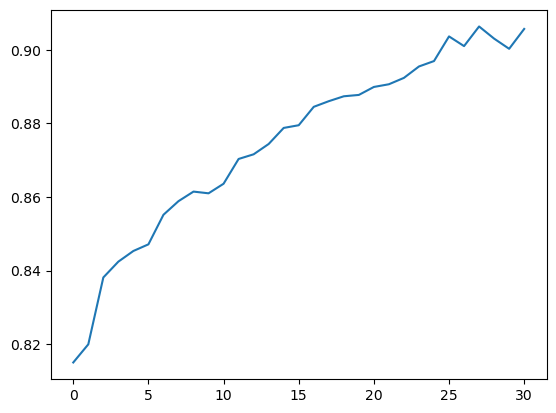

In [21]:
mean_rep_DT = []
for bd in range(n_learning_steps-1):
    temp_mean = []
    for rep in range(number_of_rep):
        temp_mean.append(results_DT["accuracy"][rep][bd])
    mean_rep_DT.append(np.mean(temp_mean))

# print(mean_rep_DT)

plt.plot(mean_rep_DT)
# plt.show()
# sns.distplot(results["accuracy"][0], kde=True, hist=False, norm_hist=False, bins=5, label='SS')
plt.show()

### Training Set Size: GNB

In [22]:
number_of_rep = 30
step_size = 50
n_learning_steps = 32
testing_size = int(0.2*len(my_df_orig))

clf = GaussianNB()
m_name = "GNB"

results_GNB = trainSingleModel(my_df_orig, range(number_of_rep), testing_size, step_size, n_learning_steps, clf, m_name, save_path="")

Repetition  0
Repetition  1
Repetition  2
Repetition  3
Repetition  4
Repetition  5
Repetition  6
Repetition  7
Repetition  8
Repetition  9
Repetition  10
Repetition  11
Repetition  12
Repetition  13
Repetition  14
Repetition  15
Repetition  16
Repetition  17
Repetition  18
Repetition  19
Repetition  20
Repetition  21
Repetition  22
Repetition  23
Repetition  24
Repetition  25
Repetition  26
Repetition  27
Repetition  28
Repetition  29


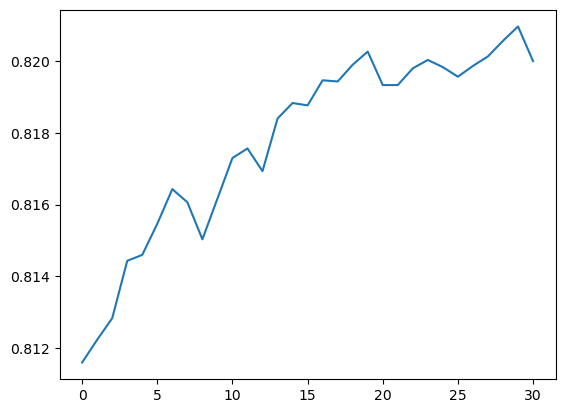

In [23]:
mean_rep = []
for bd in range(n_learning_steps-1):
    temp_mean = []
    for rep in range(number_of_rep):
        temp_mean.append(results_GNB["accuracy"][rep][bd])
    mean_rep.append(np.mean(temp_mean))

# print(mean_rep)

plt.plot(mean_rep)
# plt.show()
# sns.distplot(results["accuracy"][0], kde=True, hist=False, norm_hist=False, bins=5, label='SS')
plt.show()

## Query-by-committee

In [24]:
def qbc_helper(Committee, X_train, y_train, X_Remained, step_size, multiplier):
    #Query new instances:
    y_pred_committee= pd.DataFrame()
    variance = pd.DataFrame()

    for member_name, committee_member in Committee.items():
        committee_member.fit(X_train,y_train)
        y_pred_committee[member_name]=committee_member.predict(X_Remained).round(4)
        y_pred_committee["Pred Avg"]=y_pred_committee.mean(axis=1).round(4)
        variance[member_name]=(y_pred_committee[member_name]-y_pred_committee["Pred Avg"])**2

    y_pred_committee = y_pred_committee.drop("Pred Avg", axis=1)

    variance_final=(variance.sum(axis=1)/len(Committee)).round(5)
    # print("variance final", variance_final)

    max_variance_indices=sorted(range(len(variance_final)), key=lambda k: variance_final[k],reverse=True)

    batch_query_indices=max_variance_indices[:int(multiplier*step_size)]

    return y_pred_committee, batch_query_indices, variance_final

In [25]:
def AL_qbc(df, repp, testing_size, step_size, n_learning_steps, Committee, save_path=""):
    
    multiplier = 1.0
    y_col = "clabel"
    x_cols = ["col1","col2","col3","col4","col5","col6","col7","col8","col9","col10","col11"]
    
    measures_new = ["accuracy", "percentage", "train_size"]
    results = dict((meas,{}) for meas in measures_new)
    for l in results:
        results[l] = dict((n_rep,[]) for n_rep in repp)
    
    for rep in repp:
        print("Repetition ", rep)
        
        df = df.sample(frac=1,random_state=rep).reset_index(drop=True)
        y_pool = df.loc[:,y_col]
        X_pool = df.loc[:,x_cols]
        X_test, y_test, X_Remained, y_Remained, X_train, y_train = split_data(X_pool, y_pool, testing_size, step_size, y_col)

        for i in range(n_learning_steps):
            # print("learning step: ", i)

            y_pred_committee, batch_query_indices, variance_final = qbc_helper(Committee, X_train, y_train, X_Remained, step_size, multiplier=multiplier)

            X_train, X_Remained, y_train, y_Remained = update_learning_region(X_train, X_Remained, y_train, y_Remained, batch_query_indices)

            y_pred=pd.DataFrame()
            name = "DT" # base learner
            model = DecisionTreeClassifier()
            model.fit(X_train,y_train)

            y_pred[name] = model.predict(X_test).round(3)
            results = update_results(results, rep, y_test, y_pred, name, X_train.shape[0], X_pool.shape[0])

    # np.save(save_path, results)
    return results

In [26]:
number_of_rep = 30
step_size = 50
n_learning_steps = 32
testing_size = int(0.2*len(my_df_orig))

from collections import OrderedDict
Committee={"DT":DecisionTreeClassifier(),"logR":LogisticRegression(), "GNB":GaussianNB()}
Committee = OrderedDict(Committee)

clf = DecisionTreeClassifier()
m_name = "DT"

results_qbc = AL_qbc(my_df_orig, range(number_of_rep), testing_size, step_size, n_learning_steps, Committee, save_path="")

Repetition  0
Repetition  1
Repetition  2
Repetition  3
Repetition  4
Repetition  5
Repetition  6
Repetition  7
Repetition  8
Repetition  9
Repetition  10
Repetition  11
Repetition  12
Repetition  13
Repetition  14
Repetition  15
Repetition  16
Repetition  17
Repetition  18
Repetition  19
Repetition  20
Repetition  21
Repetition  22
Repetition  23
Repetition  24
Repetition  25
Repetition  26
Repetition  27
Repetition  28
Repetition  29


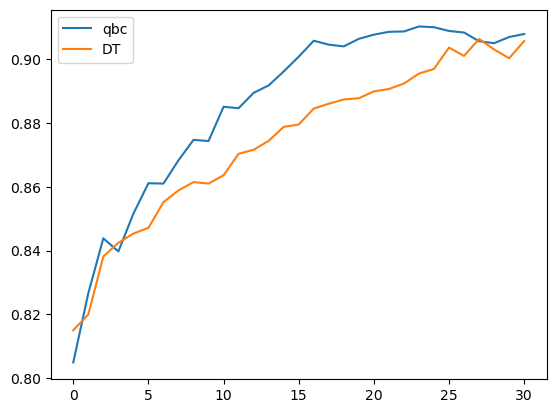

In [27]:
mean_rep_qbc = []
for bd in range(n_learning_steps-1):
    temp_mean = []
    for rep in range(number_of_rep):
        temp_mean.append(results_qbc["accuracy"][rep][bd])
    mean_rep_qbc.append(np.mean(temp_mean))

plt.plot(mean_rep_qbc, label="qbc")
plt.plot(mean_rep_DT, label="DT")
plt.legend(loc="upper left")
plt.show()